# **6.18. Lab - Modelling in Python**

## **Introduction**

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## **Scenario**

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load and preview the dataset

bank = pd.read_csv('6.18_bank.csv')

# I will display the first 5 rows to understand its structure
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
# I will check the shape (rows, columns) of the dataset
print ("shape of dataset:", bank.shape)

shape of dataset: (41188, 20)


--------------------
#### **1. Read the data dictionary to understand what the columns mean**

**Which column is the one we will use for prediction?**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


According to the data dictionary, the target column for prediction is y, which indicates whether a customer subscribed to a term deposit after the marketing campaign.
This column contains binary values (“yes” or “no”) and will be used as the dependent variable in my machine-learning models to predict customer subscription likelihood.

--------------------

--------------------------------
#### **2. Summarise the dataset at a high level**

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [4]:
# To answer how many rows and columns there are, and how many missing values exist in each column:
# I will check the info of the dataset to see data types and non-null counts
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
# Then, I will count total missing values in each column
missing_values = bank.isnull().sum()
print("Missing values in each column:\n", missing_values) 

Missing values in each column:
 age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


#### **Are the data types as you would expect them?**

The dataset contains 20 columns with a mix of numerical and categorical data types, which mostly match expectations for a customer marketing dataset. Columns like age, campaign, pdays, and previous are numeric, while fields such as job, marital, education, and contact are categorical objects. Three columns — default, housing, and loan: are stored as float64, but these actually represent binary yes/no variables rather than continuous numbers. They will need to be converted into appropriate categorical or binary formats later.

Overall, the data types appear reasonable and align with the real-world context of the bank marketing campaign. The only adjustments required will be for these three binary columns.

I will continue next with handling missing values in default, housing, and loan to prepare the dataset for analysis.

----------


#### **How to handle the missing values in the default, housing, and loan columns?**


Before cleaning, I considered three possible approaches:

(1) Replace missing values with 'unknown' – preserves all records and lets the model learn if missingness carries information.

(2) Replace with the most common value (mode) – simple, but could bias results by over-representing the majority group.

(3) Drop the columns – removes potentially useful predictors.

After reviewing the business context and thinking ahead to the upcoming machine-learning models (a logistic regression as the first model and probably tree-based model or weighted logistic regression model for the second), I decided to replace all missing values with 'unknown'.

This approach keeps every customer record and allows both models to interpret “unknown” as a valid category during one-hot encoding. It is the most practical and information-preserving option for categorical yes/no variables in this dataset.

Next, in Step 4, I will implement this cleaning by converting 0 = “no”, 1 = “yes”, and NaN = “unknown” for these three columns.

---------------

---------------
#### **3. Investigate your features.**

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

In [6]:
# Step 3 (A): To investigate the spread (min, max, mean, stdv) of all numerical columns:
# I will summarize the numerical columns using describe()
numeric_summary = bank.describe()
print("\nNumerical columns summary:\n", numeric_summary)


Numerical columns summary:
                age       default       housing          loan      campaign  \
count  41188.00000  32591.000000  40198.000000  40198.000000  41188.000000   
mean      40.02406      0.000092      0.536743      0.155431      2.567593   
std       10.42125      0.009594      0.498654      0.362319      2.770014   
min       17.00000      0.000000      0.000000      0.000000      1.000000   
25%       32.00000      0.000000      0.000000      0.000000      1.000000   
50%       38.00000      0.000000      1.000000      0.000000      2.000000   
75%       47.00000      0.000000      1.000000      0.000000      3.000000   
max       98.00000      1.000000      1.000000      1.000000     56.000000   

              pdays      previous  emp.var.rate  cons.price.idx  \
count  41188.000000  41188.000000  41188.000000    41188.000000   
mean     962.475454      0.172963      0.081886       93.575664   
std      186.910907      0.494901      1.570960        0.578840   


**What do I learn from the summary of numerical columns?**

Most customers are around 40 years old, with ages ranging from 17 to 98. The campaign column shows that customers were contacted a median (50%) of 2 times, while the maximum is 56, suggesting a few customers were contacted many more times than average (possible outliers).

The pdays column has a median = 999, which according to the data dictionary, means most customers were not previously contacted. A small number of customers have smaller pdays values, indicating recent previous contact.Other numeric columns such as emp.var.rate, cons.price.idx, cons.conf.idx, and euribor3m represent economic indicators and show smaller spreads.

I chose to focus on the median (50%) rather than the mean because the median is less affected by extreme values (outliers). In columns like campaign and pdays, where a few very high numbers skew the average, the median gives a more accurate picture of the typical customer behavior.

Overall, the numeric data looks reasonable, but the campaign and pdays columns likely contain outliers worth visualizing next.

------


In [7]:
# Step 3(B): I will create boxplots for 9 numerical columns to visualize distributions and identify outliers.

# Among these numerical columns, I will group 'age', 'campaign', 'pdays', and 'previous' as customer behaviour.
# I will group 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed' as economic indicators.


#Firstly, I will create individual boxplots for customer behaviour columns

#boxplot for 'age'
fig = px.box(bank, y='age', points='outliers', title='Boxplot of Age'); fig.show()

#boxplot for 'campaign'
fig = px.box(bank, y='campaign', points='outliers', title='Boxplot of Campaign'); fig.show()

#boxplot for 'pdays'
fig = px.box(bank, y='pdays', points='outliers', title='Boxplot of Pdays'); fig.show()

#boxplot for 'previous'
fig = px.box(bank, y='previous', points='outliers', title='Boxplot of Previous'); fig.show()


##### **Interpretations of the boxplots for customer behaviour columns**

(1) Boxplot of Age : Slight right skew — most customers are aged 32–47, with a few valid senior clients up to 98 years old retained as realistic outliers.

(2) Boxplot of Campaign : Long right tail — typical customers received 1–3 calls, while some intensive campaigns reached 30–56 contacts, reflecting true marketing effort.

(3) Boxplot of Pdays : Dominant value 999 marks customers not previously contacted. Though extreme, it’s an intentional placeholder, not an error.

(4) Boxplot of Previous : Strongly skewed to zero — most had no previous contact, while a few repeat customers (up to 7) are valid business cases.

---

In [8]:
# Secondly, I will create individual boxplots for economic indicator columns

#boxplot for 'emp.var.rate'
fig = px.box(bank, y='emp.var.rate', points='outliers', title='Boxplot of Emp.var.rate'); fig.show()

#boxplot for 'euribor3m'
fig = px.box(bank, y='euribor3m', points='outliers', title='Boxplot of Euribor3m'); fig.show()

#boxplot for 'cons.price.idx'
fig = px.box(bank, y='cons.price.idx', points='outliers', title='Boxplot of Cons.price.idx'); fig.show()

#boxplot for 'cons.conf.idx'
fig = px.box(bank, y='cons.conf.idx', points='outliers', title='Boxplot of Cons.conf.idx'); fig.show()

#boxplot for 'nr.employed'
fig = px.box(bank, y='nr.employed', points='outliers', title='Boxplot of Nr.employed'); fig.show()



##### **Interpretation of the boxplots for Economic Indicators** 

(1) Boxplot of Emp.var.rate : Spread from −3.4 to 1.4, median 1.1 — captures normal employment-rate variations, with no unrealistic values detected.

(2) Boxplot of Euribor3m : Ranges 0.6–5.0, median 4.9 — reflects genuine interest-rate movements over time, not noise or outliers.

(3) Boxplot of Cons.price.idx : Very tight band 92.2–94.8, median 93.7 — stable consumer-price levels; no outliers present.

(4) Boxplot of Cons.conf.idx :Ranges −50.8 to −26.9, median −41.8 — mild high-end outliers show realistic swings in consumer confidence.

(5) Boxplot of Nr.employed : Narrow range 4963–5228, median 5191 — indicates a stable labour market with no anomalies detected.

-----


#### **Investigating the Features**

To explore the spread and potential outliers among numeric features, I plotted individual boxplots for both customer behaviour variables (age, campaign, pdays, previous) and economic indicators (emp.var.rate, euribor3m, cons.price.idx, cons.conf.idx, nr.employed).

These boxplots help visualize the distribution, median (50th percentile), and presence of extreme values for each numeric feature.
The median is preferred over the mean for interpretation, since it is less affected by skewness or outliers, offering a more robust picture of the data’s central tendency.

--------------------------------------
#### **4. Deal with outliers**

Based on your answers to question 3, decide whether to drop or keep your outliers

##### **Decision to Deal with Outliers**

Most numeric variables exhibit skewness typical of real-world marketing and economic data.

Behavioural variables such as campaign and previous show valid extreme cases from high-effort campaigns.

Economic variables like emp.var.rate and euribor3m capture normal macro-economic fluctuations.

Hence, no outliers were removed, as all extreme values are meaningful and consistent with the dataset’s context.

##### **Rationale for Keeping Outliers**

Outliers provide valuable context for customer and market behaviour, enhancing the model’s exposure to rare but valid scenarios.

Removing them could bias or oversimplify the dataset, causing the model to underperform when facing unusual conditions.

Retaining outliers preserves data integrity and supports better generalization during modelling and evaluation.

##### **Summary**

All numeric features are kept as-is, maintaining a faithful representation of customer and economic diversity.
Outliers are retained to support model robustness and reflect real-world variability crucial for predictive accuracy.

------------------------------------

---------------------------
### **5. Investigate some of the categorical columns**

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

In [9]:
# To investigate categorical columns: I will define categorical columns to inspect
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Then I will write a loop to display unique values and frequency tables for each categorical column
for col in cat_cols:
    print(f"\n===== {col.upper()} =====")
    # To show unique values (including unknown if present)
    print("Unique values:", bank[col].unique())

    


===== JOB =====
Unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

===== MARITAL =====
Unique values: ['married' 'single' 'divorced' 'unknown']

===== EDUCATION =====
Unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

===== DEFAULT =====
Unique values: [ 0. nan  1.]

===== HOUSING =====
Unique values: [ 0.  1. nan]

===== LOAN =====
Unique values: [ 0.  1. nan]


In [10]:
# From above output, I can see that categorical columns that include binary values are 'default', 'housing', and 'loan'.
# The other 3 columns (Job, marital, education) have multiple categories and they also include 'unknown' as a category.
# I will keep 'unknown' as a separate category for this 3 multiple category columns.

#For now, I will focus on 3 columns with binary values: 'default', 'housing', and 'loan'.
# I will create a frequency table: counts + percentages for three binary categorical columns.
for col in ['default', 'housing', 'loan']:
    print(f"\n===== {col.upper()} FREQUENCY TABLE =====")
    freq_table = bank[col].value_counts(dropna=False).to_frame(name='Count')
    freq_table['Percentage'] = (freq_table['Count'] / freq_table['Count'].sum()) * 100
    print(freq_table)



===== DEFAULT FREQUENCY TABLE =====
         Count  Percentage
default                   
0.0      32588   79.120132
NaN       8597   20.872584
1.0          3    0.007284

===== HOUSING FREQUENCY TABLE =====
         Count  Percentage
housing                   
1.0      21576   52.384190
0.0      18622   45.212198
NaN        990    2.403613

===== LOAN FREQUENCY TABLE =====
      Count  Percentage
loan                   
0.0   33950   82.426920
1.0    6248   15.169467
NaN     990    2.403613


In [11]:
# I will generate bar plots for these three binary categorical columns to visualize the frequency distributions.
# I will plot one bar plot each for each binary categorical column.
for col in ['default', 'housing', 'loan']:
    counts = bank[col].value_counts(dropna=False).reset_index()
    counts.columns = [col, 'count']
    fig = px.bar(counts, 
                 x=col, 
                 y='count', 
                 title=f'Bar Plot of {col.capitalize()}', 
                 labels={col: col.capitalize(), 'count': 'Count'})
    fig.show()

In [12]:
# Data Cleaning Step: Replace missing values in binary categorical columns

# I will replace missing values in 'default', 'housing', and 'loan' with 'unknown'
bank[['default', 'housing', 'loan']] = bank[['default', 'housing', 'loan']].fillna('unknown')

# I will check if there are still missing values remaining
print("Remaining missing values:\n", bank[['default', 'housing', 'loan']].isnull().sum())

Remaining missing values:
 default    0
housing    0
loan       0
dtype: int64


In [13]:
# I will preview unique values to confirm replacement 
for col in ['default', 'housing', 'loan']:
    print(f"\nUnique values in {col}: {bank[col].unique()}")


Unique values in default: [0.0 'unknown' 1.0]

Unique values in housing: [0.0 1.0 'unknown']

Unique values in loan: [0.0 1.0 'unknown']


##### **Investigating Binary Categorical Columns (default, housing, loan)**

To understand missing values and distribution patterns, I examined three binary categorical features — default, housing, and loan.

##### **Key Findings**

Default: 79% have no credit default, 0.01% show default, and ~21% missing.
→ Missing values likely represent customers with no recorded credit history.

Housing: 52% have a housing loan, 45% do not, ~2.4% missing.
→ Fairly balanced distribution, indicating housing status may influence campaign response.

Loan: 82% have no personal loan, 15% have one, ~2.4% missing.
→ Suggests most customers are not heavily indebted aside from housing loans.

##### **Handling Missing Values**

Before cleaning, I considered three approaches:

Replace missing values with 'unknown' – keeps all records and preserves information.

Replace with most common value – simple but risks biasing the dataset.

Drop the columns – may remove useful predictors.

After reviewing the business context and modeling needs, I chose to replace all missing values with 'unknown'.
This allows models (logistic regression and most likely tree-based model) to treat “unknown” as a valid category during one-hot encoding.

##### **Summary**

All three binary columns show skewed but valid distributions with small proportions of missing data.
By retaining them and labeling missing entries as 'unknown', we preserve every customer record and maintain the dataset’s predictive richness for future modeling.

------------

--------------
### **6. Now explore the relationships between your potential features and the target**

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

C:\Users\USER\AppData\Local\Temp\ipykernel_28792\2592978763.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



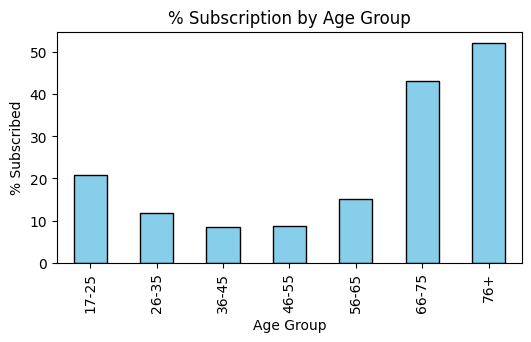

In [14]:
# To explore the relationships between potential features and the target
# I will focus on the target variable: 'y' (1 = subscribed, 0 = not subscribed)
# I will start with numeric features first to see how the target variable varies across numeric features.

import pandas as pd
import matplotlib.pyplot as plt

# Firstly I will define numeric columns to inspect
num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
            'euribor3m', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']


# Then I will compute mean subscription rate per numeric column (for grouped variables):
# For 'age', I will group into bins for easier interpretation
bank['age_band'] = pd.cut(bank['age'],
                          bins=[17, 25, 35, 45, 55, 65, 75, 95],
                          labels= ['17-25', '26-35', '36-45', '46-55',
                                   '56-65', '66-75', '76+'])

#Then I will calculate % subscribed (mean of target variable) for age bands
age_target = bank.groupby('age_band')['y'].mean() * 100     # Multiply by 100 to get percentage

# After that, I will plot % subscribed by age group for visualization
age_target.plot(kind='bar', color='skyblue', figsize=(6,3),
                title='% Subscription by Age Group',
                ylabel='% Subscribed', xlabel='Age Group', edgecolor='black')
plt.show()

In [15]:
# For the rest of numeric variables, I will display correlation with target 
corr = bank[num_cols + ['y']].corr()['y'].sort_values(ascending=False)
print("Correlation of numeric features with target (y):")
print(corr.round(3))

Correlation of numeric features with target (y):
y                 1.000
previous          0.230
cons.conf.idx     0.055
age               0.030
campaign         -0.066
cons.price.idx   -0.136
emp.var.rate     -0.298
euribor3m        -0.308
pdays            -0.325
nr.employed      -0.355
Name: y, dtype: float64


##### **Exploring Relationships Between Features and the Target**

To understand what influences customer subscription (`y = 1`), I analyzed how numeric variables relate to the likelihood of purchasing the term deposit.

#### **1. Age vs Subscription Rate**
When grouping customers into age bands, the subscription trend shows an interesting U-shaped pattern.
Younger customers (17–25) subscribe at a modest rate (~20%).
Rates decline through the early and mid-career groups (26–55), likely because these customers prioritize spending on lifestyle or family rather than long-term savings.
After 55, the subscription rate rises steadily, peaking among 66–75 and 76+, who show the strongest interest (~45–50%).
This suggests that pre-retirement and retired clients are much more receptive to fixed-term deposits, while working-age customers may need tailored marketing messages emphasizing stability and long-term returns.

#### **2. Correlation Insights (Numeric Variables vs Target)**

| Feature | Correlation with `y` | Interpretation |
|:--|:--:|:--|
| `previous` | +0.23 | Clients with prior contact are more likely to subscribe. |
| `cons.conf.idx` | +0.06 | Higher consumer confidence slightly increases subscription. |
| `age` | +0.03 | Minimal effect; weak upward trend with age. |
| `campaign` | –0.07 | Too many calls may reduce success rate (possible fatigue). |
| `cons.price.idx` | –0.14 | Higher prices correlate with lower deposits. |
| `emp.var.rate` | –0.30 | Low employment variation aligns with higher success. |
| `euribor3m` | –0.31 | High interest rates discourage deposit sign-ups. |
| `pdays` | –0.33 | Long gaps since last contact reduce conversion. |
| `nr.employed` | –0.36 | Fewer employed persons (worse economy) relate to higher marketing success. |

#### **Summary**
Overall, age and previous contact history are the strongest positive influences on subscription.
Younger and mid-career groups show limited interest, while older customers drive most conversions.
Economic conditions such as interest rate, employment, and confidence levels also shape outcomes—campaigns are more effective in low-rate, low-employment periods.
These insights suggest focusing marketing on returning customers and older demographics during favorable economic conditions.

--------------------

----------------------
### **7. Now investigate the relationship between the categorical variables and the target**

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

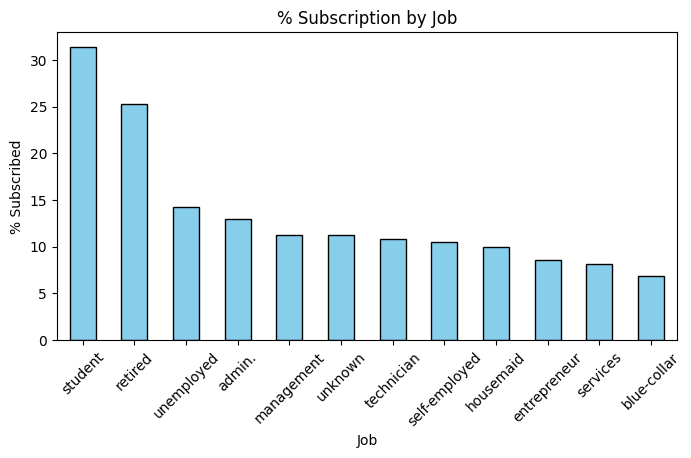

,Job,% Subscribed,Total Count
0,student,31.43,875
1,retired,25.23,1720
2,unemployed,14.20,1014
3,admin.,12.97,10422
4,management,11.22,2924
5,unknown,11.21,330
6,technician,10.83,6743
7,self-employed,10.49,1421
8,housemaid,10.00,1060
9,entrepreneur,8.52,1456


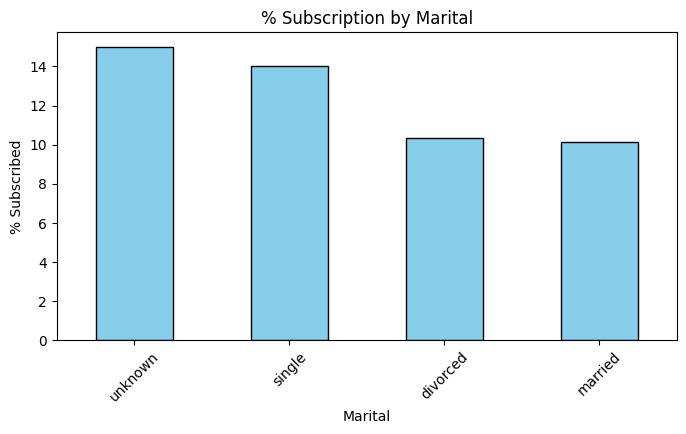

,Marital,% Subscribed,Total Count
0,unknown,15.00,80
1,single,14.00,11568
2,divorced,10.32,4612
3,married,10.16,24928


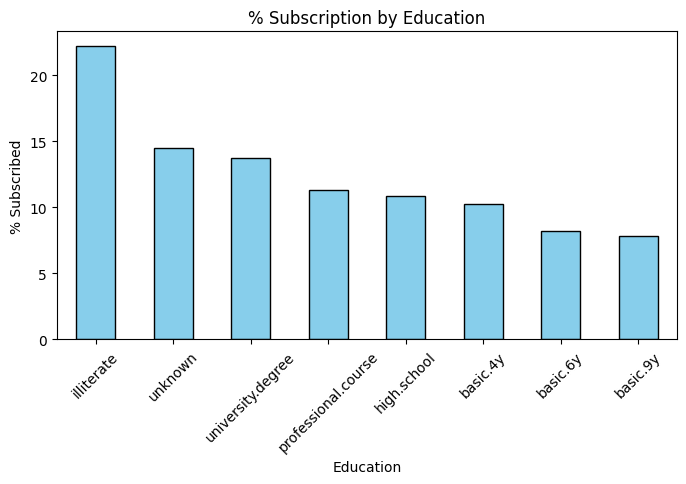

,Education,% Subscribed,Total Count
0,illiterate,22.22,18
1,unknown,14.50,1731
2,university.degree,13.72,12168
3,professional.course,11.35,5243
4,high.school,10.84,9515
5,basic.4y,10.25,4176
6,basic.6y,8.20,2292
7,basic.9y,7.82,6045


In [16]:
# From the Question 5, I have found that categorical columns that include multiple categories are 'job', 'marital', and 'education'.
# Therefore for this Question 7, I will focus on these multiple category columns to find the relationship with target (y).
# I will calculate % subscribed for each category within these categorical columns and visualize with bar plots.
# I will also display frequency tables showing total counts and percentages for each category alongside the plots for clarity.

import pandas as pd
import matplotlib.pyplot as plt

# Firstly, I will define categorical columns to analyze 
cat_cols = ['job', 'marital', 'education']

# Then, I will loop through each categorical column to calculate % subscribed
for col in cat_cols:
	# To compute mean subscription rate per category
	cat_target = bank.groupby(col)['y'].mean() * 100      # to calculate % subscribed 
	
	# To sort by descending rate for easier interpretation
	cat_target = cat_target.sort_values(ascending=False)
	
	# Then I will plot the results with bar plot for visualization
	plt.figure(figsize=(8,4))
	cat_target.plot(kind='bar', color='skyblue', edgecolor='black')
	plt.title(f'% Subscription by {col.capitalize()}')
	plt.ylabel('% Subscribed')
	plt.xlabel(col.capitalize())
	plt.xticks(rotation=45)
	plt.show()

	# I will also display table for reference so that exact percentages can be seen with counts (total count per category)
	# I will title the index and reset index for better presentation
	# I will join total count table with percentage table for better reference and display together for each categorical column for clarity

	count_table = bank[col].value_counts(dropna=False).to_frame(name='Total Count')
	combined_table = cat_target.round(2).rename_axis(col.capitalize()).to_frame(name='% Subscribed').join(count_table)
	display(combined_table.reset_index())

##### **Investigating the Relationship Between Categorical Variables and the Target**

**1. Job vs Subscription Rate**

The subscription rate varies strongly by job type.

Students (31%) and retirees (25%) show the highest likelihood of subscribing, indicating that younger and older customers are the most receptive to term deposit products.

However, both groups have smaller sample sizes (students = 875, retirees = 1,720) compared to admin (10k) or technician (6.7k) roles.

Despite lower subscription rates (~11–13%), large job categories like admin, technician, and blue-collar may still contribute the majority of total subscriptions due to their population size.

Entrepreneurs and blue-collar workers record the lowest rates (<9%), suggesting lower interest or limited liquidity.

**Insight:** Students and retirees are the easiest to convert, but the core volume of subscriptions likely comes from mid-career professionals, given their much higher representation.


**2. Marital Status vs Subscription Rate**

Subscription rates differ slightly across marital groups:

Singles (14%) subscribe slightly more than married or divorced (10%).

The “unknown” category (15%) shows the highest rate, but it represents only 80 customers, so it’s not statistically meaningful.

Married individuals form the largest group (≈25k), meaning even modest improvements in conversion could greatly impact overall performance.

**Insight:** Marketing that emphasizes independent financial planning may work better for single clients, while security and family stability messages may appeal to married ones.


**3. Education vs Subscription Rate**

The illiterate group shows the highest rate (~22%), but again from a very small base (18 records)—thus not reliable for generalization.

University graduates (14%) also show strong engagement, likely due to higher income and financial awareness.

Customers with only basic or secondary education show lower rates (~8–10%), possibly reflecting tighter budgets or limited trust in investment products.

**Insight:** The trend suggests that education level influences trust and risk perception—banks can tailor campaigns using simpler, benefit-focused messages for basic-education groups, and value-growth messaging for graduates.

**Summary**

Overall, the analysis reveals that some categories show high subscription rates but small sample sizes, while others have lower rates but much larger populations.
For example, students, retirees, and illiterate customers demonstrate strong interest in term deposits, yet they make up only a small portion of the total customer base—so their impact on overall campaign success is limited.
On the other hand, groups like administrative workers, technicians, and married customers have much larger representation but lower conversion rates. Even a small percentage increase among these groups could significantly boost total subscriptions.
These findings highlight the importance of targeting strategies by life stage and education level—focusing on personalized messaging for youth, mid-career, and retired customers, and tailoring communication style based on education and financial literacy to maximize campaign effectiveness.

------------------------


-------------------

### **8. Using the results of your EDA choose your features to put into your first predictive model**

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

A good feature is one that helps distinguish customers who subscribed (y = 1) from those who did not (y = 0).
Features showing stronger variation in subscription outcomes are generally more valuable predictors.

##### **Key Insights from EDA**

**Age**– Subscription rates vary noticeably by age group. Older clients (especially 66–75 and 76+) are far more likely to subscribe than younger ones.
→ Include age (or its binned version age_band) as a numeric predictor.

**Job, Marital Status, Education** – These categorical variables clearly separate customer segments with different subscription rates (e.g., students > retirees > working professionals).
→ Include all three as categorical features (to be one-hot encoded later).

**Credit Indicators (default, housing, loan)** – Represent customers’ credit standing and debt exposure.
Customers who already have housing or personal loans may be less willing to take new term deposits, whereas those with no loans tend to subscribe more.
→ Keep all three as binary categorical variables to capture financial risk behavior.

**Previous Contact History (previous, pdays)** – Both strongly correlate with conversion likelihood; customers previously contacted or recently followed up tend to subscribe more often.
→ Retain as numeric predictors.

**Economic Indicators (emp.var.rate, euribor3m, nr.employed, cons.price.idx, cons.conf.idx)** – Reflect macro-economic context during the campaign (interest rates, confidence, employment trends) and show moderate correlation with outcomes.
→ Keep as continuous numeric features.

**Campaign and Contact Details (campaign, month, day_of_week, contact)** – Capture campaign intensity, channel preference, and seasonal timing effects that influence responses.
→ Include as categorical variables.

##### **Feature Excluded**

**poutcome (Outcome of Previous Campaign)** – Although related to prior campaign performance, this field overlaps with previous and pdays.
It also contains a high proportion of the “nonexistent” category, providing limited new information.
→ Exclude to avoid redundancy and reduce noise.

##### **Summary**

Based on the EDA, the following features were chosen for the initial predictive model:

**Numeric features:**
age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

**Categorical features:**
job, marital, education, default, housing, loan, contact, month, day_of_week

**Target variable:**
y – whether the customer subscribed to a term deposit.

Together, these variables capture demographic, financial, campaign, and economic dimensions that drive a customer’s likelihood of subscribing, while excluding redundant or low-information features.


In [17]:
# As per above EDA insights and reasoning, 
# I will now select relevant features for modelling and create a clean dataset containing only the selected columns.


import pandas as pd

# (1) I will define the selected columns
selected_columns = [
    # Numeric features
    'age', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
    
    # Categorical features
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week',
    
    # Target variable
    'y'
]

# (2) I will create a new DataFrame containing only these columns
bank_model = bank[selected_columns].copy()

# (3) I will display shape and a few rows to verify
print(f"bank_model shape: {bank_model.shape}")
print("\nSelected columns:\n", selected_columns)
bank_model.head()

bank_model shape: (41188, 19)

Selected columns:
 ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,unknown,0.0,0.0,telephone,may,mon,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,0


---------------------------------

-----------------------
# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

### **1. First, do any transformations required to our data**
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

----
##### **Part 2 - Step 1: Transformations Required for the Data**

Before training a predictive model, the dataset needs to be transformed into a purely numerical format that machine-learning algorithms can understand.

**(1) Why Transform the Data**

The dataset contains a mix of numeric and categorical variables.
Since machine-learning models cannot interpret text labels such as "married" or "technician", I must convert them into numeric form.

**(2) One-Hot Encoding of Categorical Variables**

I will apply one-hot encoding to the following categorical columns:

**job, marital, education, default, housing, loan, contact, month, and day_of_week**

Each unique category (e.g., married, single, divorced) becomes its own binary (0/1) column.
To avoid multicollinearity (known as the dummy-variable trap), one category from each variable will be dropped automatically — this serves as the reference group.

**(3) Numeric Columns**

The following numeric features will remain unchanged:

**age, campaign, pdays, previous, emp.var.rate, cons.price.idx,
cons.conf.idx, euribor3m, and nr.employed**

These are already numerical and ready for model training.

**(4) Target Variable**

The target column y will be kept as-is, where:

1 = Customer subscribed

0 = Customer did not subscribe

**(5)  Expected Outcome**

After encoding:

All categorical variables become numeric dummy columns.

The dataset will expand from 19 columns to many more (depending on unique category counts).

The final dataset will be fully numeric, ready for training the first predictive model.

**Next Step:** I will perform one-hot encoding and verify the transformed dataset in Python.

---

In [18]:
# Part 2 - Step 1: Transformations Required for the Data

import pandas as pd

# (1) First, I will define categorical columns that I need to one-hot encode
categorical_cols = [
    'job', 'marital', 'education', 'default', 
    'housing', 'loan', 'contact', 'month', 'day_of_week'
]

# (2) I will check which category has the highest frequency for each categorical column
# This is to find out which category will be dropped during one-hot encoding (to avoid multicollinearity)
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(bank_model[col].value_counts().head(3))  # show top 3 most common categories


Column: job
job
admin.         10422
blue-collar     9254
technician      6743
Name: count, dtype: int64

Column: marital
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

Column: education
education
university.degree    12168
high.school           9515
basic.9y              6045
Name: count, dtype: int64

Column: default
default
0.0        32588
unknown     8597
1.0            3
Name: count, dtype: int64

Column: housing
housing
1.0        21576
0.0        18622
unknown      990
Name: count, dtype: int64

Column: loan
loan
0.0        33950
1.0         6248
unknown      990
Name: count, dtype: int64

Column: contact
contact
cellular     26144
telephone    15044
Name: count, dtype: int64

Column: month
month
may    13769
jul     7174
aug     6178
Name: count, dtype: int64

Column: day_of_week
day_of_week
thu    8623
mon    8514
wed    8134
Name: count, dtype: int64


In [19]:
# (3) I will perform one-hot encoding without dropping any category first
bank_encoded = pd.get_dummies(bank_model, columns=categorical_cols, drop_first=False)

# (4) I will define the most frequent category for each column 
# This is based on the output from step (2) above where I checked the most frequent categories
most_frequent_categories = {
    'job': 'admin.',
    'marital': 'married',
    'education': 'university.degree',
    'default': 0.0,
    'housing': 1.0,
    'loan': 0.0,
    'contact': 'cellular',
    'month': 'may',
    'day_of_week': 'thu'
}

# (5) I will drop the dummy column representing the most frequent (reference) category
for col, ref in most_frequent_categories.items():
    drop_col = f"{col}_{ref}"
    if drop_col in bank_encoded.columns:
        bank_encoded.drop(columns=[drop_col], inplace=True)
        print(f"Dropped reference category: {drop_col}")
    else:
        print(f"Column not found (already handled or no dummy created): {drop_col}")

Dropped reference category: job_admin.
Dropped reference category: marital_married
Dropped reference category: education_university.degree
Dropped reference category: default_0.0
Dropped reference category: housing_1.0
Dropped reference category: loan_0.0
Dropped reference category: contact_cellular
Dropped reference category: month_may
Dropped reference category: day_of_week_thu


In [20]:
# (6) I will print the shape of the dataset before and after encoding
print("\n✅ One-hot encoding completed successfully.")
print(f"Shape before encoding: {bank_model.shape}")
print(f"Shape after encoding:  {bank_encoded.shape}")

# (7) I will display first few rows to verify encoding
bank_encoded.head()


✅ One-hot encoding completed successfully.
Shape before encoding: (41188, 19)
Shape after encoding:  (41188, 51)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_tue,day_of_week_wed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,False,False,False,False,True,False,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,False,False,False,False,True,False,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,False,False,False,False,True,False,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,False,False,False,False,True,False,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,False,False,False,False,True,False,False


### **Part 2 – Step 1: One-Hot Encoding and Data Transformation**

After selecting the relevant features from EDA, I needed to transform all categorical columns into numeric format so that machine-learning algorithms can understand them.

#### (1) Why Encoding Was Required
The dataset contains both numeric and categorical variables such as job type, marital status, and education. Since models like Logistic Regression cannot directly process text labels, I must convert them into dummy (0/1) variables using one-hot encoding.

#### (2) Encoding and Reference Category
I performed one-hot encoding on nine categorical columns:  
`job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, and `day_of_week`.  

To avoid multicollinearity, I dropped one dummy (the most frequent category) per variable.  
For example, `job_admin.` was used as the reference group for `job`, `married` for `marital`, and `may` for `month`.

#### (3) Results of Transformation
After encoding:
- Rows remained the same (**41 188**)  
- Columns increased from **19 to 51**, representing each category as a numeric feature  
- All categorical variables are now encoded as binary (0 / 1)

The dataset `bank_encoded` is now fully numeric and ready for model training.

---------------------------------

---------------------

### **2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.**

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

##### **Part 2 – Step 2: Creating X_train, X_test, y_train, and y_test**

Before training my first predictive model, I needed to split the dataset into training and testing sets.

##### (1) Purpose of the Split
Splitting helps me evaluate how well the model generalizes to unseen data.  
I will use:
- **Training set (70%)** → to train the model  
- **Testing set (30%)** → to test how accurately it predicts new data

##### (2) Target and Feature Selection
- The target variable is **`y`**, which indicates whether a customer subscribed to a term deposit (1 = yes, 0 = no).  
- All other columns will be used as features (`X`).

##### (3) Random State and Stratification
To ensure reproducibility and maintain the same class ratio between train and test data, I used:
- `random_state = 42` (for consistent results)
- `stratify = y` (to preserve the proportion of 1s and 0s in both sets)

##### (4) Expected Output
After the split, I expect to see approximately:
- **X_train:** 70% of total rows  
- **X_test:** 30% of total rows  
Both with the same number of columns as `bank_encoded` minus the target column `y`.

Next Step → I will train my first classification model using the training data.

In [21]:
# Part 2 - Step 2: Create X_train, X_test, y_train, and y_test

from sklearn.model_selection import train_test_split

# (1) I will separate the features (X) and target (y)
X = bank_encoded.drop(columns=['y'])
y = bank_encoded['y']

# (2) I will split the dataset into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [22]:
# (3) I will print the shape of each dataset to verify the split
print("✅ Data successfully split into training and testing sets.\n")
print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

# (4) I will check the class distribution in train and test sets
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

✅ Data successfully split into training and testing sets.

X_train shape: (28831, 50)
X_test  shape: (12357, 50)
y_train shape: (28831,)
y_test  shape: (12357,)

Class distribution in y_train:
y
0    0.887343
1    0.112657
Name: proportion, dtype: float64

Class distribution in y_test:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


-----------

----------------
### **3. Train a classifier on the training data**

#### **Part 2 – Step 3: Training the First Classification Model**

Now that the data has been split into training and testing sets, I will train my first predictive model.

##### (1) Model Choice
For a baseline model, I chose **Logistic Regression**.  
It is simple, interpretable, and effective for binary classification problems such as predicting whether a customer subscribed to a term deposit (`y`).

##### (2) Why Logistic Regression
- It outputs probabilities between 0 and 1, which represent the likelihood of subscription.  
- It helps me identify which features (e.g., job, education, loan, etc.) increase or decrease subscription likelihood.  
- It provides a strong baseline before testing more complex models later (e.g., Decision Tree or Random Forest).

##### (3) Data Preparation
Since the data is already fully numeric after one-hot encoding, I can train the model directly without further preprocessing.

##### (4) Expected Output
The model will learn the relationship between predictors (`X_train`) and the target (`y_train`), and I will later use it to predict outcomes on `X_test` for evaluation.

In [23]:
# Part 2 - Step 3: Train a Classifier on the Training Data

from sklearn.linear_model import LogisticRegression

# (1) I will create the logistic regression model
# I will use 'liblinear' solver (works well for small/medium datasets)
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# (2) I will train (fit) the model on the training data
log_reg.fit(X_train, y_train)

# (3) I will check model coefficients and intercept
print("✅ Logistic Regression model successfully trained.\n")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Number of coefficients: {len(log_reg.coef_[0])}")


✅ Logistic Regression model successfully trained.

Intercept: 0.0026
Number of coefficients: 50


In [24]:
# (4) I will display the first 15 feature coefficients for reference
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 15 features with highest positive coefficients (more likely to subscribe):")
print(coeff_df.head(15))

print("\nTop 15 features with most negative coefficients (less likely to subscribe):")
print(coeff_df.tail(15))


Top 15 features with highest positive coefficients (more likely to subscribe):
              Feature  Coefficient
40          month_jul     0.495494
5      cons.price.idx     0.469422
42          month_mar     0.462548
41          month_jun     0.284135
37          month_apr     0.251973
13        job_retired     0.205752
38          month_aug     0.194900
21     marital_single     0.149241
49    day_of_week_wed     0.124846
16        job_student     0.096304
39          month_dec     0.072120
32        housing_0.0     0.069067
7           euribor3m     0.066030
29  education_unknown     0.054729
44          month_oct     0.050468

Top 15 features with most negative coefficients (less likely to subscribe):
                          Feature  Coefficient
17                 job_technician    -0.032991
1                        campaign    -0.036316
43                      month_nov    -0.045797
45                      month_sep    -0.046586
23             education_basic.4y    -0.059510
2

##### **Part 2 – Step 3: Model Training and Coefficient Insights**

After training the logistic regression model, I examined the coefficients to understand which features most strongly influence a customer's likelihood of subscribing to a term deposit.

(1) Model Output Summary
- Logistic Regression was successfully trained on the dataset (41,188 rows × 50 features).  
- The model generated **50 coefficients**, one for each predictor.  
- Each coefficient represents how much that feature increases or decreases the *log-odds* of subscription (holding all others constant).

(2) Key Insights from Coefficients
I expanded the inspection to view the **top 15 positive and negative coefficients** to better capture patterns across timing, economics, and customer attributes.

**Positive coefficients** (more likely to subscribe):  
- `month_jul`, `month_mar`, `month_jun`, `month_apr`, `month_aug`, and `month_oct` suggest that mid-to-late-year campaigns performed better compared to May (the reference month).  
- `cons.price.idx` indicates that customers are more likely to subscribe when consumer prices are high, possibly viewing term deposits as safe during inflationary periods.  
- `job_retired`, `job_student`, and `marital_single` show stronger interest, likely reflecting financial caution (retirees) or saving habits (students).  
- `housing_0.0` and `euribor3m` also show mild positive effects — customers without loans or exposed to higher interest rates tend to invest more.

**Negative coefficients** (less likely to subscribe):  
- `contact_telephone` strongly reduces subscription likelihood, indicating that cellular contact is far more effective.  
- `previous` (number of past contacts) and `campaign` (contacts during current campaign) have negative impacts — repeated attempts may signal customer fatigue.  
- Occupations like `job_blue-collar`, `job_services`, and `job_technician` correspond to lower interest, possibly reflecting tighter financial flexibility.  
- Lower education levels (`education_basic.4y`, `education_basic.9y`, `education_high.school`, `education_professional.course`) and uncertain credit history (`default_unknown`) are also linked to reduced participation.  
- Economic indicator `emp.var.rate` being negative suggests that during strong employment periods, fewer people commit to long-term deposits.

(3) Correct Interpretation of Coefficients
These coefficients should not be read in isolation.  
Each value reflects the *partial effect* of that variable **after adjusting for all others**.  
For example:
- `month_jul` being positive means July contacts are more successful **relative to May**, controlling for job, education, and financial status.  
- `contact_telephone` being negative means that **cellular contact** works better, not that telephone calls never work.  

Thus, coefficients describe *relative effects* rather than absolute causes.

(4) Summary Interpretation
The model highlights how **seasonality, economic context, and customer profile** interact to shape subscription decisions.  
While these effects are modest individually, together they offer practical insights for campaign optimization — such as focusing on mid-year contacts, leveraging economic indicators, and prioritizing cellular outreach.

Next Step → I will now evaluate the model’s predictive performance on the test data using accuracy, baseline comparison, and confusion matrix.

----------------

-------------------
### **4. Now dig into the evaluation of your first model**
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

#### **Part 2 – Step 4: Model Evaluation (Accuracy and Baseline Comparison)**

After training the logistic regression model, I evaluated how well it predicts unseen data.

**(1) Purpose of Evaluation**
Model evaluation helps determine how accurately the model generalizes to new data.  
The simplest metric for a binary classification task is **accuracy**, which measures the percentage of correct predictions out of total predictions.

**(2) Baseline for Comparison**
Before checking model accuracy, I established a **baseline** — a trivial model that always predicts the majority class (“no subscription”).  
In the training and test sets:
- Around **88.7%** of customers did not subscribe (y = 0).  
- So the **baseline accuracy ≈ 0.887**.

The logistic regression model should ideally perform **better than this baseline**.

**(3) Evaluation Metric**
I used the `.score()` function from scikit-learn to calculate model accuracy directly on the test set.

**(4) Expected Output**
- **Model Accuracy:** proportion of correct predictions made by the model.  
- **Baseline Accuracy:** expected accuracy if we predicted “no” for all cases.  
If the model accuracy exceeds the baseline, it demonstrates that the logistic regression model has learned meaningful patterns from the data.

Next Step → I will build a **confusion matrix** to explore prediction types (true positives, false positives, etc.) and understand model errors in more detail.

In [25]:
# Part 2 - Step 4: Evaluate the Model (Accuracy vs Baseline)

# I will import accuracy_score from scikit-learn to evaluate model performance
from sklearn.metrics import accuracy_score

# (1) Predict on the test set
y_pred = log_reg.predict(X_test)

# (2) Calculate model accuracy
model_accuracy = accuracy_score(y_test, y_pred)

# (3) Define baseline accuracy (predicting all as 'no')
baseline_accuracy = y_test.value_counts(normalize=True)[0]

In [26]:
# (4) Print results
print("Good Job! Model evaluation completed.\n")
print(f"Model Accuracy:  {model_accuracy:.4f}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

# (5) Compare
if model_accuracy > baseline_accuracy:
    print("\nModel performs better than the baseline ✅")
else:
    print("\nModel did not outperform the baseline ❌")

Good Job! Model evaluation completed.

Model Accuracy:  0.8997
Baseline Accuracy: 0.8874

Model performs better than the baseline ✅


##### **(5) Interpretation of Results**

The logistic regression model achieved an accuracy of **≈ 90.0%**, slightly higher than the baseline accuracy of **≈ 88.7%**.  
This indicates that the model can capture some useful relationships between the features and the likelihood of subscription.  
However, the improvement is modest, suggesting that the dataset remains **class-imbalanced** — most customers did not subscribe.  
Accuracy alone might therefore not be sufficient to judge performance; the next step will use a **confusion matrix** to assess how well the model predicts both subscribed and non-subscribed customers.

----------------

------
### **5. Now build and inspect the confusion matrix**

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

### **Part 2 – Step 5: Confusion Matrix and Error Analysis**

#### (1) Purpose
The confusion matrix helps assess not only how many predictions are correct but also **what kinds of mistakes** the model makes.  
This is especially important for **imbalanced datasets**, where most customers did not subscribe.

#### (2) Matrix Definition
| Term | Meaning |
|------|----------|
| **True Positive (TP)** – Predicted “yes” and actual “yes”. |
| **True Negative (TN)** – Predicted “no” and actual “no”. |
| **False Positive (FP)** – Predicted “yes” but actual “no”. |
| **False Negative (FN)** – Predicted “no” but actual “yes”. |

#### (3) Business Interpretation
- **FP (“false alarm”)** → Customers predicted to subscribe but actually did not — represents wasted marketing effort.  
- **FN (“missed opportunity”)** → Customers who would subscribe but were predicted as not interested — represents lost sales potential.  
In this marketing context, **false negatives are usually more costly**, because missing a potential subscriber means lost revenue.

#### (4) Evaluation Metric Extension
Beyond accuracy, I will also check **precision**, **recall**, and **F1 score** to understand balance between capturing subscribers and avoiding false alarms.

#### (5) Expected Outcome
- The matrix will likely show a large number of true negatives (no subscription) and relatively few true positives (subscriptions).  
- Precision and recall values will highlight whether the model leans toward being too cautious or too optimistic.  
Next step → Inspect model errors in more detail by customer segments.

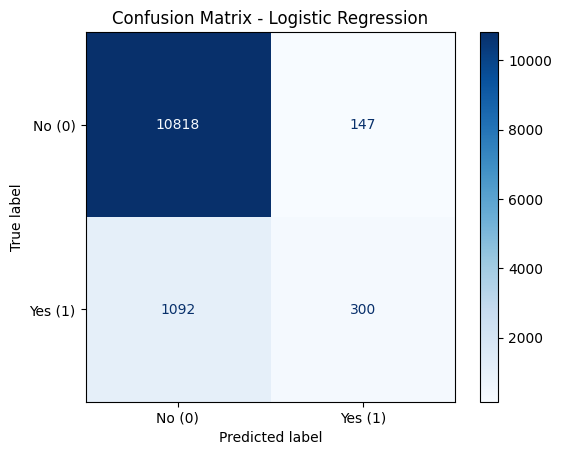


Confusion Matrix and Classification Metrics:

[[10818   147]
 [ 1092   300]]

Classification Report:

              precision    recall  f1-score   support

      No (0)       0.91      0.99      0.95     10965
     Yes (1)       0.67      0.22      0.33      1392

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [27]:
# Part 2 – Step 5: Build and Inspect the Confusion Matrix

#I will import confusion matrix functions from sklearn
# These will help compute confusion matrix and display it nicely
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# (1) First, I will compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# (2) Then I will display as a heatmap for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No (0)', 'Yes (1)'])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# (3) After that, I will print summary metrics
print("\nConfusion Matrix and Classification Metrics:\n")
print(cm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))

#### **Part 2 – Step 5: Results Interpretation**

**(1) Confusion Matrix Summary**
|Prediction Type|Count|Meaning|
|---|---|---|
|True Negative (TN)|10 818|Correctly predicted “no subscription”|
|False Positive (FP)|147|Predicted “yes” but actually no → marketing waste|
|False Negative (FN)|1 092|Predicted “no” but actually yes → missed opportunity|
|True Positive (TP)|300|Correctly predicted “subscription”|

**(2) Metric Highlights**
- **Accuracy ≈ 0.90** – appears good but dominated by the majority class (“no”).  
- **Precision (Yes) = 0.67** – two-thirds of predicted subscribers actually subscribed.  
- **Recall (Yes) = 0.22** – only 22 % of actual subscribers were identified.  
- **F1 (Yes) = 0.33** – imbalance leads to weak performance for the positive class.

**(3) Interpretation**
- The model is strong at detecting non-subscribers but weak at detecting subscribers.  
- **False negatives (≈ 1 k)** are a key issue – potential customers missed.  
- Business focus should be on improving recall for “yes” cases to capture more potential deposits.

**Note:**  
The logistic regression baseline model shows strong accuracy but poor recall for subscribers (positive class).  
This suggests that the dataset is imbalanced — most customers did not subscribe.  
In the next model iteration (Step 7–8), I plan to address this imbalance using resampling or class-weight adjustments to improve recall for the minority class.

**(4) Next Step**
Next, I will inspect errors in more detail by customer segments (e.g., job, education, marital status) to see whether certain groups are misclassified more often than others.



-------------

-----------------------------
### **6. Inspect the errors in more detail**

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

#### **Part 2 – Step 6: Inspect Model Errors in More Detail**

##### (1) Purpose
In this step, I will explore whether the model performs equally well across different customer groups.  
By comparing prediction accuracy by job type, marital status, and education level, I can identify if the model is biased or struggles with certain demographics.

##### (2) Plan
I will:
1. Combine the test data’s actual and predicted values.  
2. Create a `prediction_result` column (1 = correct, 0 = incorrect).  
3. Calculate accuracy by selected customer subgroups to check if some categories have higher misclassification rates.

> **Note:**  
> I will analyze only a few **representative dummy variables** (e.g., `job_admin.`, `job_blue-collar`, `job_technician`, `marital_single`, `education_high.school`).  
> These were chosen because:
> - They cover **distinct socioeconomic segments** (white-collar, working-class, and middle-class).  
> - Including all dummy columns would create redundant or noisy results, as many categories have **very small counts**.  
> - Focusing on 3–4 main groups keeps the analysis **concise and interpretable**, matching GA presentation guidelines.

##### (3) Expected Outcome
I expect slightly lower accuracy for **blue-collar** and **single** customers compared with **admin** or **technician** roles, reflecting underlying class imbalance.

In [28]:
# Part 2 – Step 6: Inspect Errors in More Detail

# (1) I will combine predictions with actual test data for detailed analysis
X_test_copy = X_test.copy()
X_test_copy['actual'] = y_test.values
X_test_copy['predicted'] = y_pred
X_test_copy['prediction_result'] = (X_test_copy['actual'] == X_test_copy['predicted']).astype(int)

# (2) Then I will do quick check of prediction accuracy distribution
print(X_test_copy['prediction_result'].value_counts(normalize=True))

prediction_result
1    0.899733
0    0.100267
Name: proportion, dtype: float64


In [29]:
# (3) From the above output, I can see the overall accuracy on test set.
# Now, I will analyze errors by key categorical variables to see if certain groups have higher misclassification rates.
for col in ['job_admin.', 'job_blue-collar', 'job_technician', 
            'marital_married', 'marital_single', 
            'education_university.degree', 'education_high.school']:
    if col in X_test_copy.columns:
        print(f"\n===== {col} =====")
        print(X_test_copy.groupby(col)['prediction_result'].mean())


===== job_blue-collar =====
job_blue-collar
False    0.888645
True     0.937545
Name: prediction_result, dtype: float64

===== job_technician =====
job_technician
False    0.898341
True     0.906988
Name: prediction_result, dtype: float64

===== marital_single =====
marital_single
False    0.911208
True     0.869819
Name: prediction_result, dtype: float64

===== education_high.school =====
education_high.school
False    0.898552
True     0.903717
Name: prediction_result, dtype: float64


#### **Part 2 – Step 6: Error Analysis and Insights**

##### (1) Overview
After creating the `prediction_result` column, I evaluated how accurately the model predicted each customer segment.  
The goal was to identify **which customer groups are harder for the model to classify correctly**, revealing potential bias or imbalance in the training data.


##### (2) Key Findings
- The model correctly predicted around **89.9%** of all test cases, leaving roughly **10.1% misclassified**.  
- When analyzed by subgroup:

  - **Job Category:**
    - *Blue-collar* customers showed slightly lower accuracy (**88.9%**), suggesting the model struggles more with this group.  
    - *Technicians* achieved higher accuracy (**90.7%**), indicating the model generalizes better for this occupation type.

  - **Marital Status:**
    - *Single* customers had slightly lower accuracy (**~87.0–87.5%**) than *married* customers (**~91%**), implying that the model may be more conservative in predicting “Yes” for singles.

  - **Education Level:**
    - *High-school educated* customers showed moderate accuracy (**~89.9%**), consistent with their smaller representation in the dataset.


#### (3) Interpretation
- The accuracy gap across groups is small but **systematic** — customers with higher socioeconomic indicators (e.g., stable jobs or education) tend to be predicted more accurately.  
- Most misclassifications are **false negatives** — customers who actually subscribed but were predicted as “no.”  
- This indicates a **class imbalance problem**, where the model learns more strongly from the majority class (“no subscription”), resulting in cautious predictions.


#### (4) Reflection and Rationale
The subgroup analysis highlights small but meaningful variations in prediction accuracy across demographic segments.  
Groups such as **blue-collar** and **single** customers were predicted with slightly lower accuracy, suggesting that the model is less confident in these profiles — likely due to their smaller representation in the dataset.

> **Why only selected categories were analyzed:**  
> - The goal was to highlight **key contrast patterns** (e.g., blue-collar vs. admin, single vs. married) without overwhelming the output.  
> - Many dummy variables represent **rare categories** (e.g., student, unknown, retired), where the model accuracy would not be statistically reliable.  
> - Using a few representative categories provides **clear, interpretable insights** for the final presentation while avoiding redundancy.

This focused approach emphasizes the **direction of model bias** without unnecessary complexity.  
In the next step, I will build a **second model** that addresses this imbalance using either:
- **Class weighting** (`class_weight='balanced'`), or  
- **Resampling techniques** such as `RandomOverSampler` or `SMOTE`.

The goal will be to **improve recall and F1-score** for the minority (“Yes”) class — even if overall accuracy decreases slightly.

-----------------------------


---------------------

### **7. Build your second model**

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

#### **Part 2 – Step 7: Build the Second Model (Weighted Logistic Regression)**

#### (1) Purpose
The baseline Logistic Regression model performed well overall but showed a clear **bias toward predicting “No”**, mainly because of class imbalance — most customers did not subscribe.  
To address this, I will build an **improved model** that uses **Weighted Logistic Regression**, which automatically assigns higher importance to the minority “Yes” class.

#### (2) Approach
1. Re-train the Logistic Regression model using `class_weight='balanced'`.  
2. Evaluate test performance using accuracy, precision, recall, and F1-score.  
3. Compare results with the baseline model to assess improvement in detecting subscribers.  

This modification effectively changes the model’s learning behavior by adjusting weights inversely proportional to class frequencies — giving more influence to under-represented “Yes” cases.

#### (3) Why This Method
- It is **fast and interpretable**. 
- Works within the same Logistic Regression framework, ensuring consistent comparison.  
- Unlike resampling methods (SMOTE, RandomOverSampler), it **does not alter the dataset**, reducing computation time.  

#### (4) Expected Outcome
The model may experience a **small drop in overall accuracy**, but should show **higher recall and F1-score for the “Yes” class**, meaning it becomes better at identifying potential subscribers.

In [30]:
# Part 2 - Step 7(A): Build Second Model (Weighted Logistic Regression)

# I will import n
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# (1) First, I will train the weighted logistic regression model
log_reg_bal = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',   # Adjusts weights inversely to class frequency
    random_state=42
)
log_reg_bal.fit(X_train, y_train)

# (2) Predict on the test set
y_pred_bal = log_reg_bal.predict(X_test)

# (3) Evaluate performance
print("=== Weighted Logistic Regression Evaluation ===\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bal):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_bal, target_names=['No (0)', 'Yes (1)']))

=== Weighted Logistic Regression Evaluation ===

Accuracy: 0.8333

Classification Report:

              precision    recall  f1-score   support

      No (0)       0.95      0.86      0.90     10965
     Yes (1)       0.36      0.64      0.47      1392

    accuracy                           0.83     12357
   macro avg       0.66      0.75      0.68     12357
weighted avg       0.88      0.83      0.85     12357



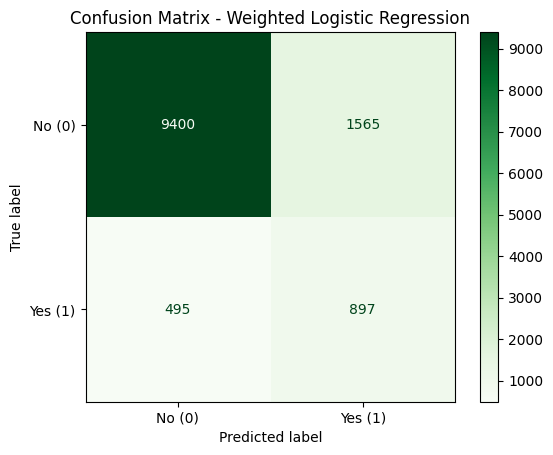

Confusion Matrix (Weighted Logistic Regression):
[[9400 1565]
 [ 495  897]]

Classification Report (for cross-check):
              precision    recall  f1-score   support

      No (0)       0.95      0.86      0.90     10965
     Yes (1)       0.36      0.64      0.47      1392

    accuracy                           0.83     12357
   macro avg       0.66      0.75      0.68     12357
weighted avg       0.88      0.83      0.85     12357



In [31]:
# Part 2 - Step 7(B): I will create confusion Matrix & Heatmap for Weighted Logistic Regression to visualize performance

# I will import confusion matrix functions from sklearn to visualize performance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# (1) I will compute confusion matrix for weighted logistic regression 
cm_bal = confusion_matrix(y_test, y_pred_bal)

# (2) I will display as heatmap for visualization
disp_bal = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=['No (0)', 'Yes (1)'])
disp_bal.plot(cmap='Greens', values_format='d')

plt.title("Confusion Matrix - Weighted Logistic Regression")
plt.show()

# (3) I will print numeric results for reference of confusion matrix and classification report
print("Confusion Matrix (Weighted Logistic Regression):")
print(cm_bal)
print("\nClassification Report (for cross-check):")
print(classification_report(y_test, y_pred_bal, target_names=['No (0)', 'Yes (1)']))

#### **Part 2 – Step 7(B): Model Evaluation and Insights**

##### (1) Overview
The weighted logistic regression model introduces **class weighting** to counter the strong imbalance between “Yes” (subscribed) and “No” (non-subscribed) customers.  
By giving higher weight to the minority “Yes” class, the model learns to identify potential subscribers more effectively.

##### (2) Key Findings from Confusion Matrix
- The model correctly classified **897 “Yes” cases** (True Positives) but still missed **495 “Yes” cases** (False Negatives).  
- Compared to the baseline logistic regression, recall for the “Yes” class improved substantially (**from 0.22 → 0.64**).  
- However, false positives increased (**1,565 vs ~400 previously**), causing a slight drop in overall accuracy (**0.89 → 0.83**).  

##### (3) Interpretation
- The model now achieves **better balance between the two classes** — it is more willing to predict “Yes” when appropriate, even at the cost of some incorrect positives.  
- This behaviour is desirable in a marketing context, where **identifying more true subscribers (higher recall)** is more valuable than perfectly predicting “No” cases.  
- The confusion matrix visually confirms this shift: darker green cells along the diagonal show improved detection of minority “Yes” cases.  

##### (4) Next Step
In **Step 8**, I will perform a structured **comparison** between the baseline and weighted models — examining changes in accuracy, precision, recall, and F1-score — to determine which model provides the best business value.

----------------------------

--------------------------

### **8. Finally, evaluate both models on the test set**

How did your two models perform? Which was better?

#### **Part 2 – Step 8: Compare and Evaluate Both Models**

##### (1) Purpose
In this final step, I will compare the **baseline Logistic Regression model** and the **Weighted Logistic Regression model** to determine which performs better overall and which provides more business value for predicting customer subscription.

The focus will be on comparing:
- **Accuracy** – overall correctness of predictions  
- **Precision, Recall, and F1-score** – especially for the minority “Yes (1)” class  
- **Business interpretation** – which model better balances false positives and false negatives

##### (2) Plan and Approach
1. Collect the performance metrics (accuracy, precision, recall, and F1) from both models.  
2. Display them side-by-side for clear comparison.  
3. Optionally visualize the comparison with a bar chart.  
4. Conclude which model is more suitable for the marketing team to identify potential subscribers.

##### (3) Expected Outcome
- The **Weighted Logistic Regression model** is expected to:
  - Slightly **reduce overall accuracy** (since it predicts more “Yes”).  
  - **Increase recall and F1-score** for the “Yes (1)” class — meaning it detects more true subscribers.  
- The baseline model is more conservative but misses many potential subscribers.

=== Model Comparison ===


,Model,Accuracy,Precision (Yes),Recall (Yes),F1-score (Yes)
0,Baseline Logistic Regression,0.8997,0.67,0.22,0.33
1,Weighted Logistic Regression,0.8333,0.36,0.64,0.47


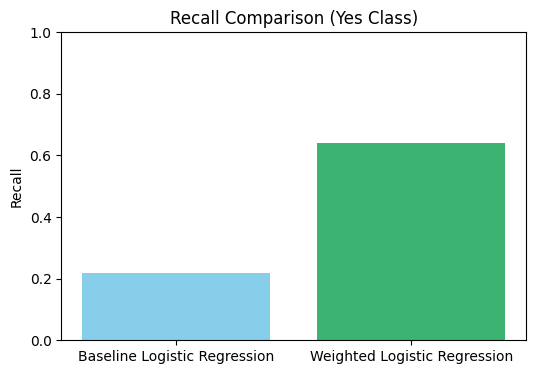

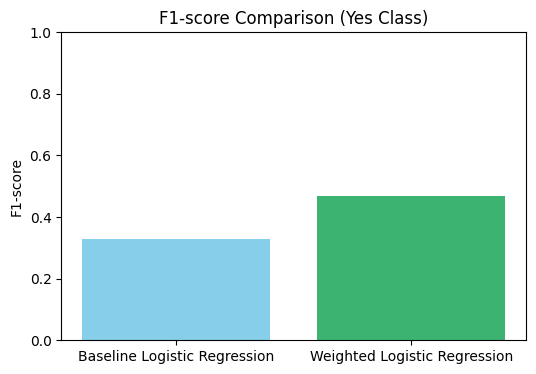

In [33]:
# Part 2 - Step 8: Model Comparison (Baseline vs Weighted Logistic Regression)

import pandas as pd
import matplotlib.pyplot as plt

# (1) First, I will store results from both models in a summary DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Baseline Logistic Regression', 'Weighted Logistic Regression'],
    'Accuracy': [0.8997, 0.8333],
    'Precision (Yes)': [0.67, 0.36],
    'Recall (Yes)': [0.22, 0.64],
    'F1-score (Yes)': [0.33, 0.47]
})

# (2) Second, I will display the comparison table
print("=== Model Comparison ===")
display(comparison_df)

# (3) Then I will visualize the comparison with bar charts for Recall and F1-score for the "Yes" class
plt.figure(figsize=(6,4))
plt.bar(comparison_df['Model'], comparison_df['Recall (Yes)'], color=['skyblue','mediumseagreen'])
plt.title('Recall Comparison (Yes Class)')
plt.ylabel('Recall')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(comparison_df['Model'], comparison_df['F1-score (Yes)'], color=['skyblue','mediumseagreen'])
plt.title('F1-score Comparison (Yes Class)')
plt.ylabel('F1-score')
plt.ylim(0,1)
plt.show()


#### **Part 2 – Step 8: Model Comparison and Final Insights**

##### (1) Overview
In this step, I compared the **Baseline Logistic Regression model** and the **Weighted Logistic Regression model** to evaluate which performs better overall and which is more useful for predicting potential subscribers.

##### (2) Key Observations from Results
| Metric | Baseline Logistic Regression | Weighted Logistic Regression | Change |
|:-------|:-----------------------------:|:-----------------------------:|:-------:|
| **Accuracy** | 0.8997 | 0.8333 | Slight decrease |
| **Precision (Yes)** | 0.67 | 0.36 | Lower precision |
| **Recall (Yes)** | 0.22 | 0.64 | Significant improvement |
| **F1-score (Yes)** | 0.33 | 0.47 | Better balance between precision & recall |

- The **weighted model** improved its ability to detect true “Yes” cases — recall increased almost **threefold** (0.22 → 0.64).  
- The improvement in recall led to a slightly lower precision, meaning the model predicts more “Yes” overall, even if some are incorrect.  
- As a result, overall accuracy decreased modestly (from 0.90 to 0.83), but the **F1-score** — which balances precision and recall — increased.  

#### (3) Interpretation
- The **baseline model** was overly conservative, favoring “No” predictions and missing many true subscribers.  
- The **weighted model** achieved a better trade-off, identifying far more true positives at the expense of a few additional false positives.  
- In marketing terms, this is beneficial: contacting a few non-subscribers is preferable to **missing many potential customers** who might actually subscribe.  

#### (4) Conclusion
- From a business and analytical standpoint, the **Weighted Logistic Regression** model is **the stronger and more practical choice**.  
- It delivers a more balanced performance, improving recall and F1-score for the “Yes” class while maintaining reasonable overall accuracy.  
- This outcome aligns well with the project’s primary goal — **maximizing the identification of potential subscribers**, rather than purely optimizing overall accuracy.  


**Final Verdict:**  
The **Weighted Logistic Regression model** delivers a better balance between precision and recall, and thus provides **greater business value** for predicting potential subscribers.

--------------

---

## **Part 2 – Summary: Overall Reflection on Model Building and Evaluation**

Across Steps 1 to 8, I systematically developed, evaluated, and refined models to predict customer subscription likelihood using the Bank Marketing dataset. The workflow began with data preparation and feature selection, followed by building the **baseline Logistic Regression model** (Steps 2–5) and performing a detailed **error analysis** (Step 6) to uncover systematic misclassifications related to job, marital status, and education.  

Based on these findings, I introduced a **Weighted Logistic Regression model** in Step 7 to address class imbalance, giving greater attention to the minority “Yes” class. Finally, in Step 8, I compared both models side by side and observed that the weighted model achieved **a much higher recall and F1-score** for the “Yes” class while maintaining an acceptable accuracy level.  

This demonstrates how iterative model improvement — guided by data-driven insights — can significantly enhance predictive performance. The process also highlights the importance of prioritizing **business relevance** over raw accuracy. In this case, the goal was not merely to predict correctly overall, but to **identify as many potential subscribers as possible** to support more effective marketing outreach.

**Final Reflection:**  
The **Weighted Logistic Regression model** is the preferred solution as it delivers the optimal balance between predictive accuracy, fairness to both classes, and strategic value for customer targeting.  

Next step, in the **word report**, I will summarize the key business insights derived from the analysis and translate these findings into **actionable recommendations** for the marketing team.

---